<a href="https://colab.research.google.com/github/DarmianNong/PortfolioProjects/blob/main/BankX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 5: Bank X

<strong>The Data:</strong> The data is related to direct marketing campaigns (phone calls) of a BankX. 

##### ***Input variables:***

*Bank client data:*

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

*Related with the last contact of the current campaign:*

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

***Other attributes:***

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

***Output variable (desired target):***

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

##### <strong>The Question:</strong> Your task is to explore the dataset and create a simple model to predict whether a customer is subscribed a term deposit or not.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# **1. Data preparation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn import metrics

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/bank/bankX.csv',sep=',')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# **2. Data wrangling**

The dataset contains no null values, and the data types were correctly assigned so there exists no jobs to be done in data wrangling.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# **3. Exploratory Data Analysis**

## ***3.1. Uni-variate data analysis of attributes***

In this section, by conducting uni-variate data analysis of the attributes, we will seek to answer the following questions:

* What are the general characteristics shared by bank clients?
* How is the current campaign performing?

### **Numerical attributes**

In [ ]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
df_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [ ]:
df_num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


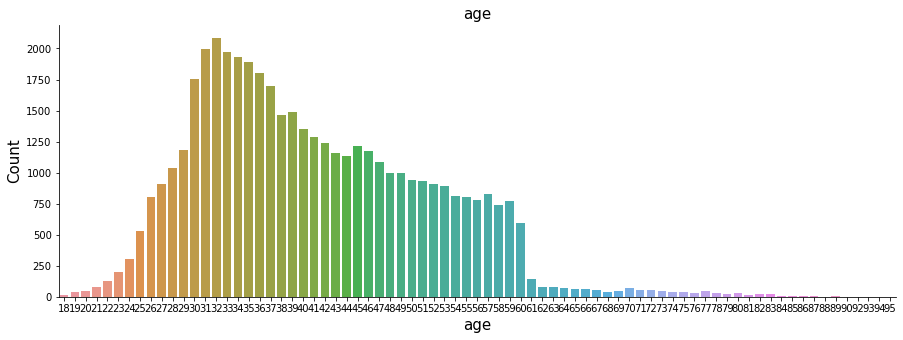

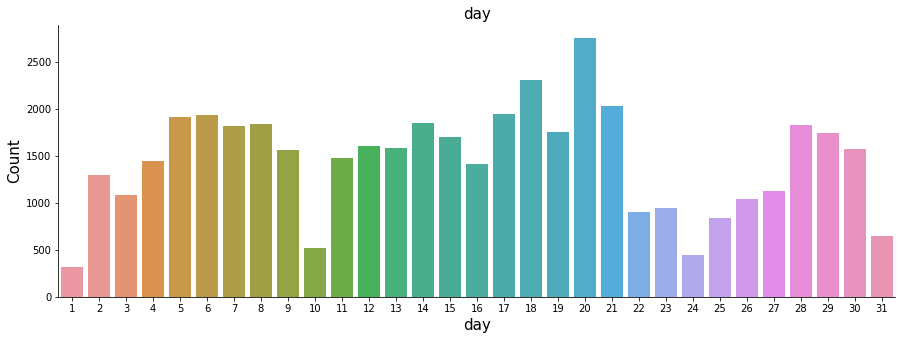

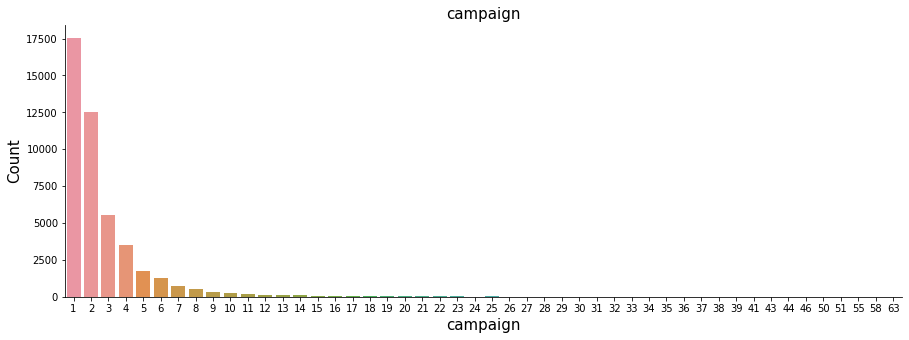

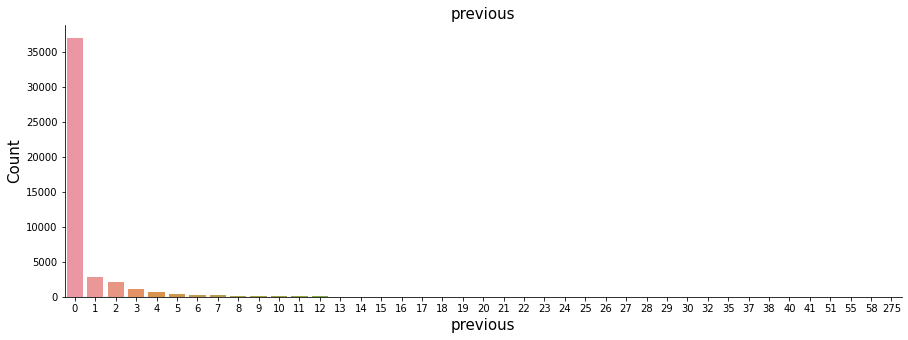

In [ ]:
for i in ['age', 'day', 'campaign', 'previous']:
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 5)
  sns.countplot(x = i, data = df)
  ax.set_xlabel(i, fontsize=15)
  ax.set_ylabel('Count', fontsize=15)
  ax.set_title(i, fontsize=15)
  sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

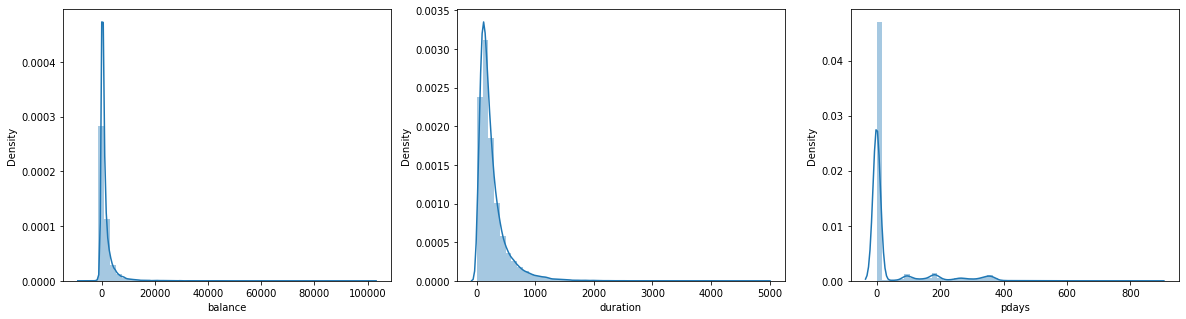

In [ ]:
fig, ax =plt.subplots(1,3, figsize = (20,5))
sns.distplot(df['balance'], ax=ax[0])
sns.distplot(df['duration'], ax=ax[1])
sns.distplot(df['pdays'], ax=ax[2])
fig.show()

### **Categorical variables**

In [ ]:
df_cat = df.drop(df_num, axis = 1).drop(df[['y']], axis = 1)
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [ ]:
df_cat.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


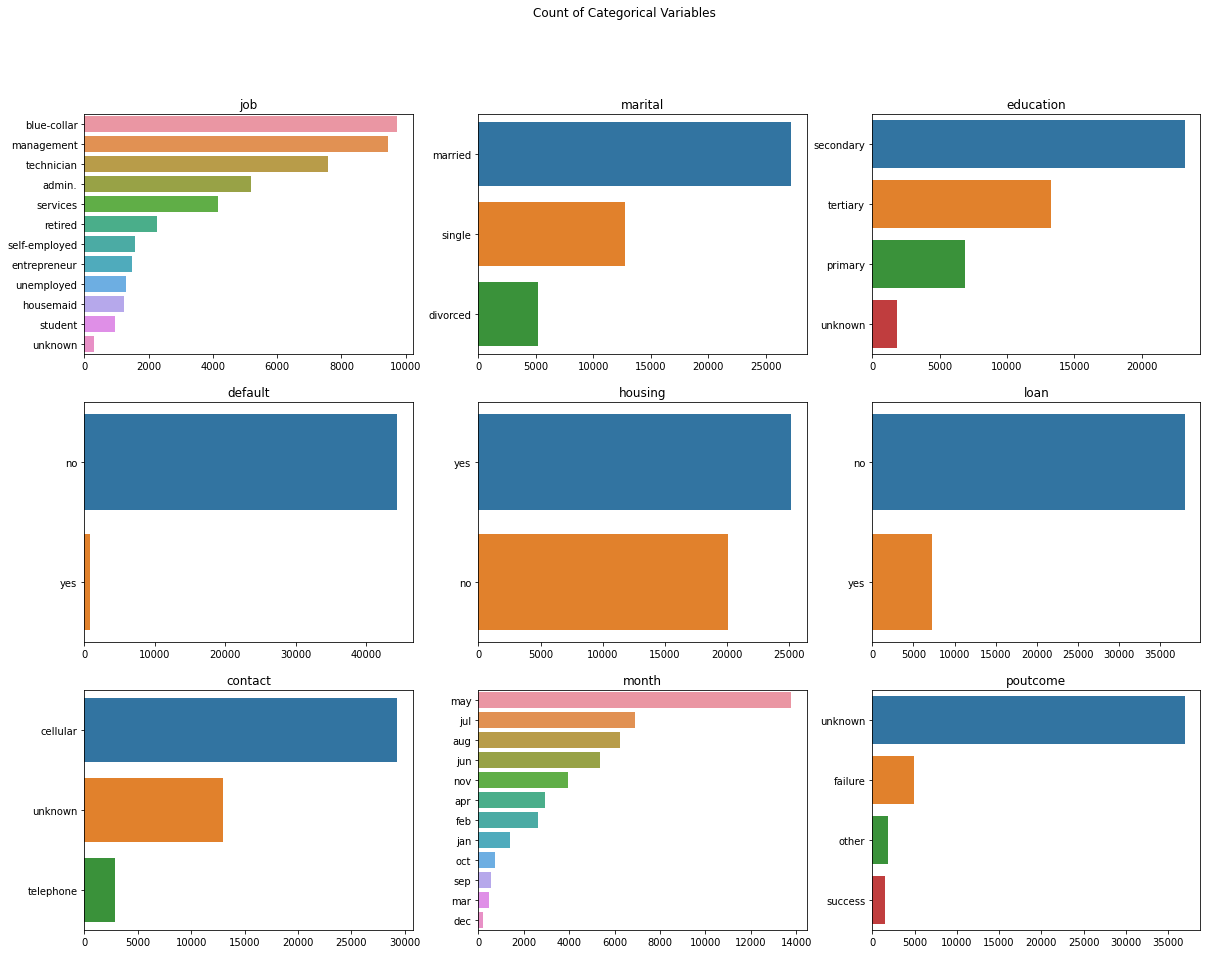

In [ ]:
fig, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))
fig.suptitle('Count of Categorical Variables')
counter = 0
for i in df_cat:
    trace_x = counter // 3
    trace_y = counter % 3
    plot = sns.barplot(ax=ax[trace_x, trace_y], x = df[i].value_counts().values, y = df[i].value_counts().index, data=df)
    plot.set_title(df[i].name)
    counter += 1

plt.show()

***Our observations of bank clients:***

**1. Age:** most clients are between the ages of 25 and 60, in which the age group from 30 to 35 accounts for the largest proportion.

**2. Day:** Day 1 is the day with the fewest clients last contacted, day 20 is the day with the most clients last contacted.

**3. Campaign:** Most clients are only contacted once in this campaign.

**4. Previous:** Before this campaign, most of the clients were only contacted once as well.

**5. Balance:** Most clients have balance close to zero.

**6. Duration:** Most clients do not spend much time on calls from banks.

**7. Pdays:** There are many clients who were not contacted in the previous campaign.

**8. Job:** The audiences of these campaigns target mostly managements, blue-collars, and technicians.

**9. Marital status:** Most of them are married; married clients are twice as single people.

**10. Education:** Most clients have high school education level while illiterate people are very less.

**11. Default/credit:** Most people have no default stay on their credit file.

**12. Housing:** More people are having housing loans than those who are not, approximately by 25%.

**13. Loan:** Most people have no personal loan.

**14. Contact:** Common means of communication are cellular.

**15. Month:** May is the busy month and December is the least busy month (because of the holidays season).

**16. Outcome of the previous marketing campaign:** Mostly unknown.

## ***3.2. Bi-variate data analysis of attributes***

In this section, by conducting bi-variate data analysis of the attributes, we will seek to answer the following questions:

* What seems to be meaningful features in distinguishing between subscribers and non-subscribers?

### **Numerical attributes vs Output variable**

Text(0.5, 1.0, 'Average yearly balance of subscribers and non-subscribers')

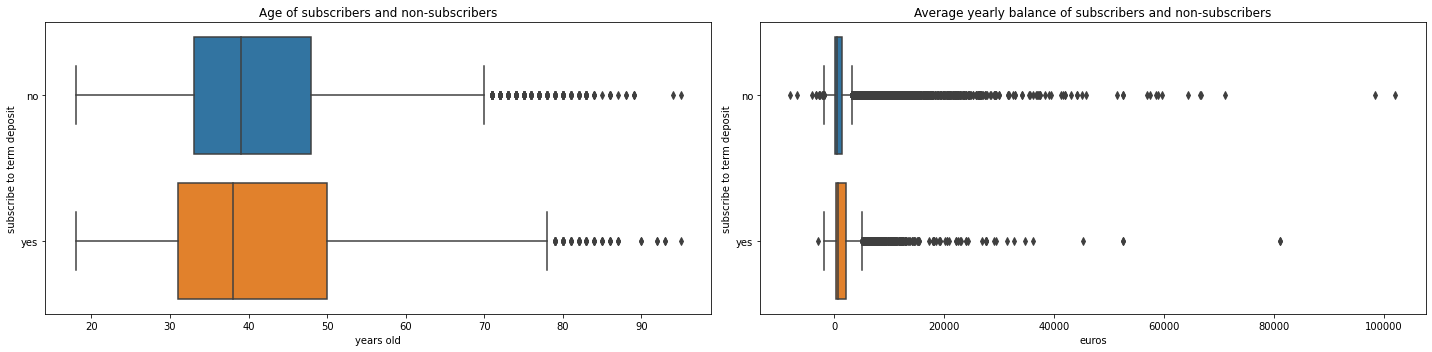

In [ ]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1,2,1)   
sns.boxplot(x='age', y='y', data=df)    
plt.title('Age of subscribers and non-subscribers')
plt.xlabel('years old')
plt.ylabel('subscribe to term deposit')
plt.subplot(1,2,2)   
sns.boxplot(x='balance', y='y', data=df)
plt.xlabel('euros')
plt.ylabel('subscribe to term deposit')
plt.title('Average yearly balance of subscribers and non-subscribers')

In terms of client data, it seems that age and balance do not show much insights to differentiate between subscribers and non-subscribers.

Text(0.5, 1.0, 'Number of contacts performed before this campaign of subscribers and non-subscribers')

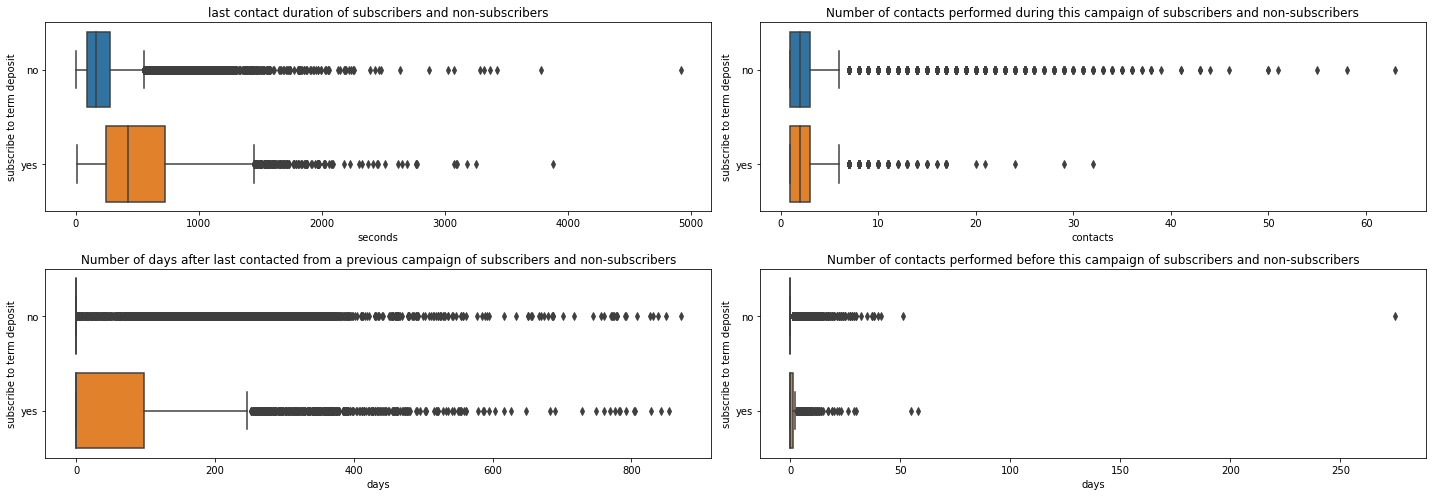

In [ ]:
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True
plt.subplot(2,2,1)   
sns.boxplot(x='duration', y='y', data=df)    
plt.title('last contact duration of subscribers and non-subscribers')
plt.xlabel('seconds')
plt.ylabel('subscribe to term deposit')
plt.subplot(2,2,2)   
sns.boxplot(x='campaign', y='y', data=df)
plt.xlabel('contacts')
plt.ylabel('subscribe to term deposit')
plt.title('Number of contacts performed during this campaign of subscribers and non-subscribers')
plt.subplot(2,2,3)   
sns.boxplot(x='pdays', y='y', data=df)
plt.xlabel('days')
plt.ylabel('subscribe to term deposit')
plt.title('Number of days after last contacted from a previous campaign of subscribers and non-subscribers')
plt.subplot(2,2,4)   
sns.boxplot(x='previous', y='y', data=df)
plt.xlabel('days')
plt.ylabel('subscribe to term deposit')
plt.title('Number of contacts performed before this campaign of subscribers and non-subscribers')

In [ ]:
agg_duration = df.groupby('y').agg({'duration':['mean', 'min','max']})/60
print('Last contact duration of subscribers and non-subscriber in minutes')
print(agg_duration)

Last contact duration of subscribers and non-subscriber in minutes
    duration                     
        mean       min        max
y                                
no   3.68638  0.000000  81.966667
yes  8.95491  0.133333  64.683333


We see that duration of last contact `duration` so far shows most viable impact on subscription behavior of bank client. When a call exceeds 8 seconds, there exists a chance that the client will subscribe; and the average duration of last call to subscribers is twice as long as that of non-subscribers.

We can infer here that the content delivered in the first 8 seconds is important, and `duration` may be an appropriate feature in our model. The other numerical attributes do not show significant insights.

### **Categorical attributes vs Output variable**

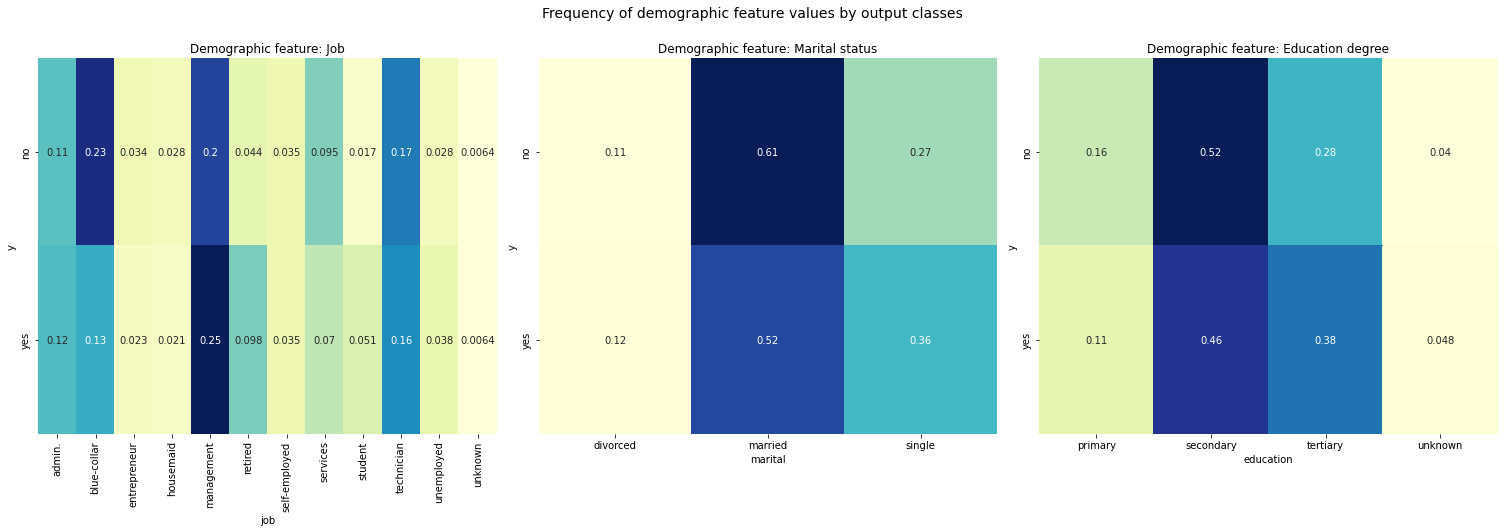

In [ ]:
plt.figure(figsize=(21,7))
plt.suptitle("Frequency of demographic feature values by output classes", fontsize=14, y=1.05)

plt.subplot(1,3,1)
plt.title("Demographic feature: Job")
plt.ylabel("subscribe to term deposit")
sns.heatmap(pd.crosstab(df['y'], df['job'], normalize='index'),
            cmap="YlGnBu", annot=True, cbar=False)

plt.subplot(1,3,2)
plt.title("Demographic feature: Marital status")
plt.ylabel("subscribe to term deposit")
sns.heatmap(pd.crosstab(df['y'], df['marital'], normalize='index'),
            cmap="YlGnBu", annot=True, cbar=False)

plt.subplot(1,3,3)
plt.title("Demographic feature: Education degree")
plt.ylabel("subscribe to term deposit")
sns.heatmap(pd.crosstab(df['y'], df['education'], normalize='index'),
            cmap="YlGnBu", annot=True, cbar=False)
plt.show()

Among demographic categorical attributes, only `job` shows slight difference in subscription behaviors: more retired clients are subscribers of term deposit than non-subscribers.

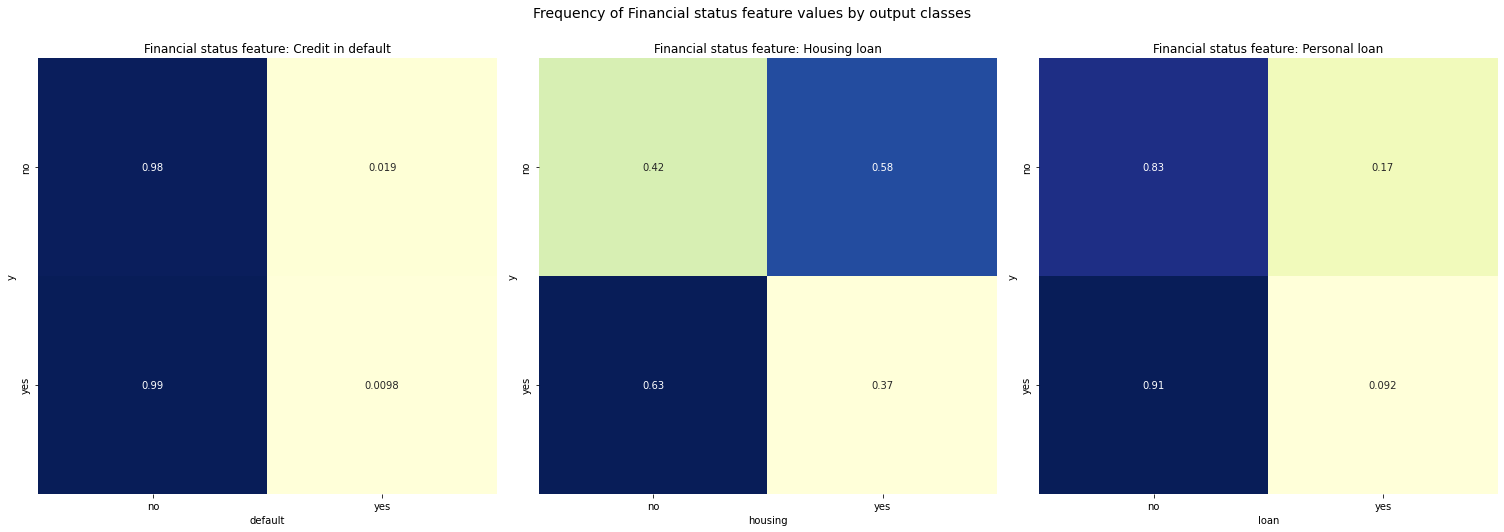

In [ ]:
plt.figure(figsize=(21,7))
plt.suptitle("Frequency of Financial status feature values by output classes", fontsize=14, y=1.05)

plt.subplot(1,3,1)
plt.title("Financial status feature: Credit in default")
plt.ylabel("subscribe to term deposit")
sns.heatmap(pd.crosstab(df['y'], df['default'], normalize='index'),
            cmap="YlGnBu", annot=True, cbar=False)

plt.subplot(1,3,2)
plt.title("Financial status feature: Housing loan")
plt.ylabel("subscribe to term deposit")
sns.heatmap(pd.crosstab(df['y'], df['housing'], normalize='index'),
            cmap="YlGnBu", annot=True, cbar=False)

plt.subplot(1,3,3)
plt.title("Financial status feature: Personal loan")
plt.ylabel("subscribe to term deposit")
sns.heatmap(pd.crosstab(df['y'], df['loan'], normalize='index'),
            cmap="YlGnBu", annot=True, cbar=False)
plt.show()

Among financial categorical attributes, only `housing` indicates a certain pattern in dictating subscription behaviors, where subscribers tend to not having a housing loan, contradictorily to non-subscribers.

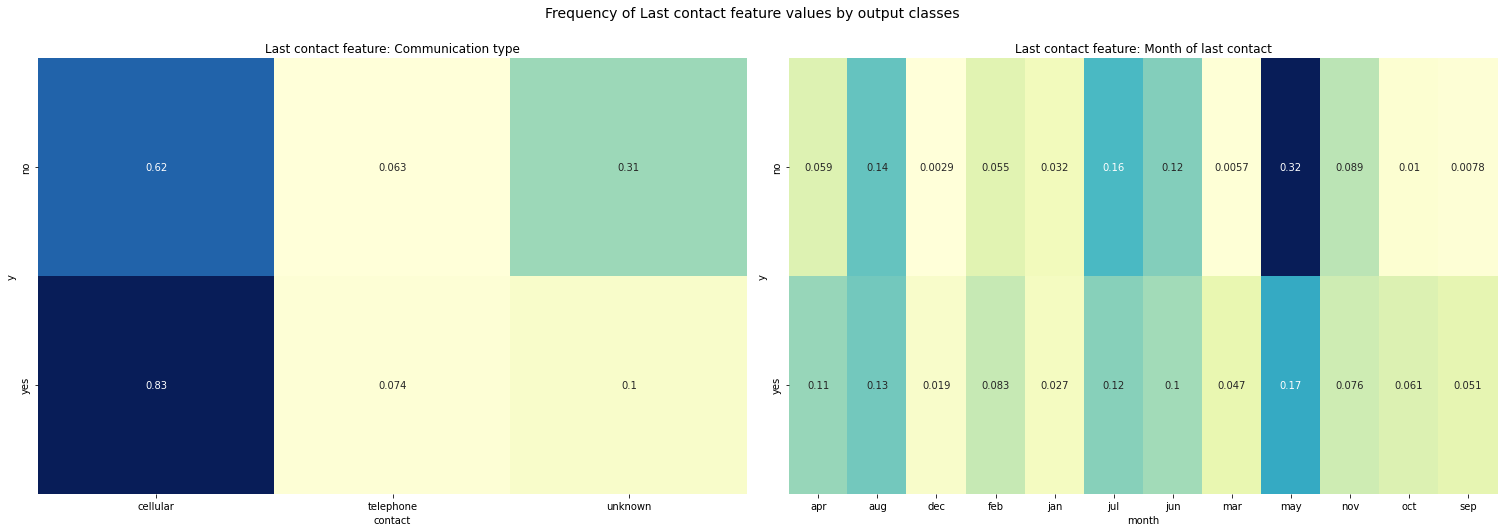

In [ ]:
plt.figure(figsize=(21,7))
plt.suptitle("Frequency of Last contact feature values by output classes", fontsize=14, y=1.05)

plt.subplot(1,2,1)
plt.title("Last contact feature: Communication type")
plt.ylabel("subscribe to term deposit")
sns.heatmap(pd.crosstab(df['y'], df['contact'], normalize='index'),
            cmap="YlGnBu", annot=True, cbar=False)

plt.subplot(1,2,2)
plt.title("Last contact feature: Month of last contact")
plt.ylabel("subscribe to term deposit")
sns.heatmap(pd.crosstab(df['y'], df['month'], normalize='index'),
            cmap="YlGnBu", annot=True, cbar=False)

plt.show()

Categorical last contact attributes do not seem to reveal much insights. However, we can observe that data about communication type of last contact (`contact`) is collected more adequately from subscribers.

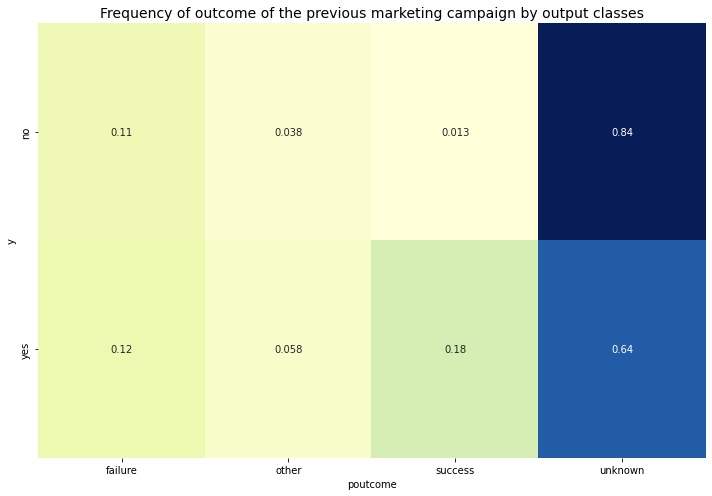

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Frequency of outcome of the previous marketing campaign by output classes", fontsize=14)
plt.ylabel("subscribe to term deposit")
sns.heatmap(pd.crosstab(df['y'], df['poutcome'], normalize='index'),
            cmap="YlGnBu", annot=True, cbar=False)
plt.show()

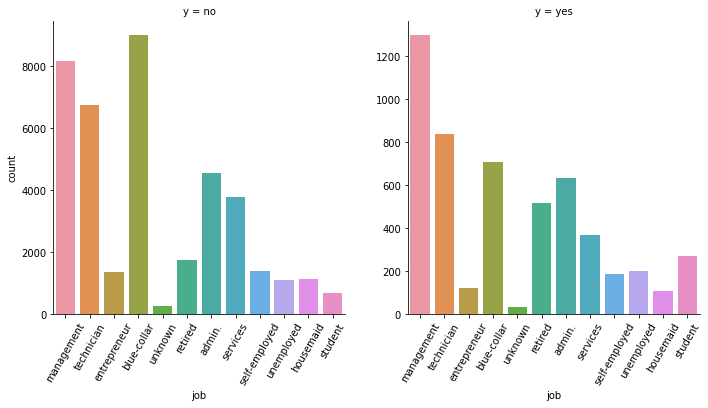

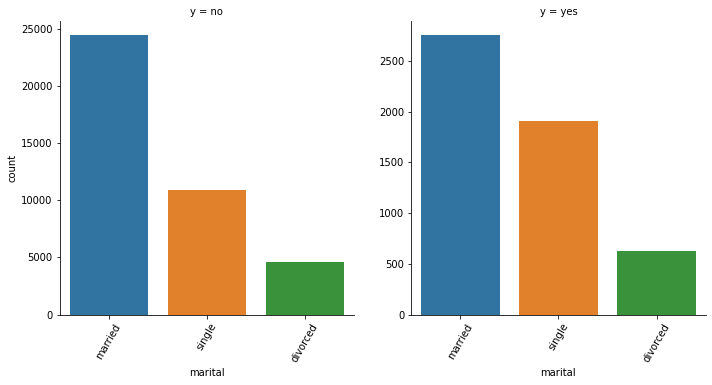

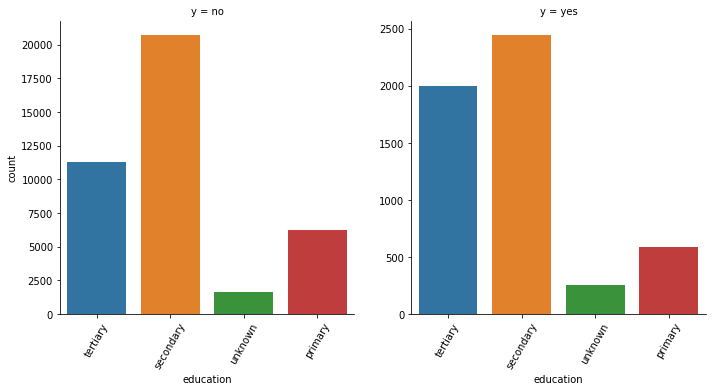

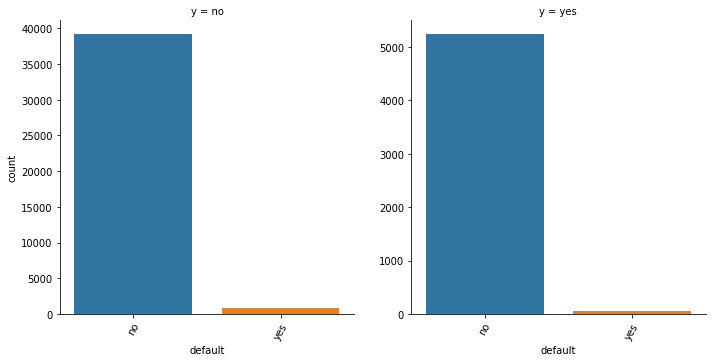

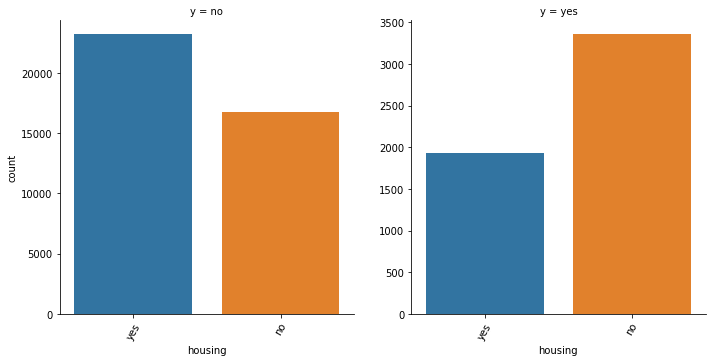

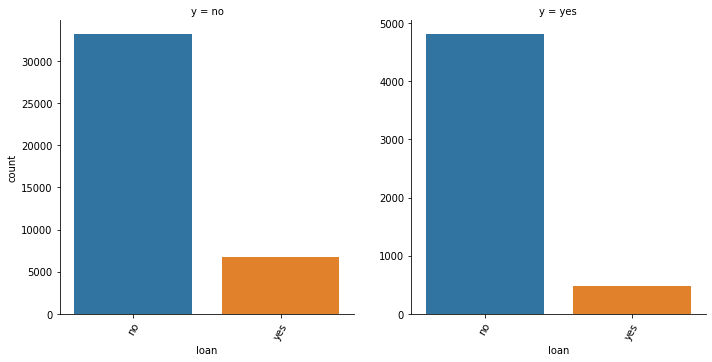

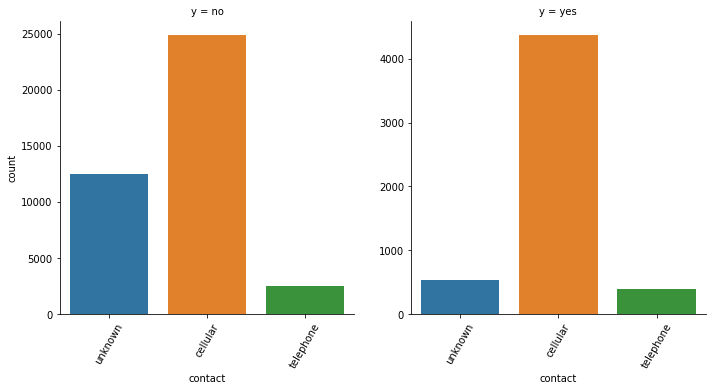

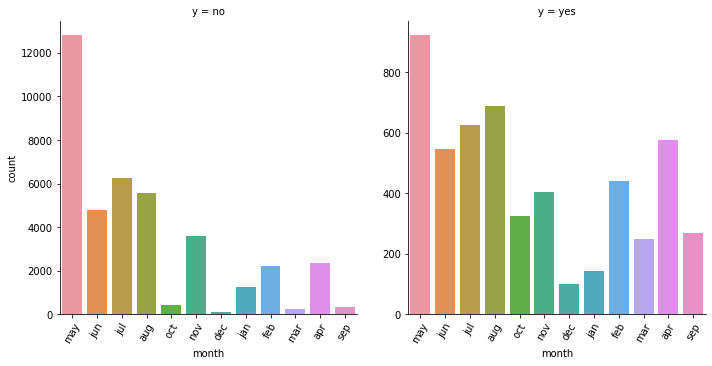

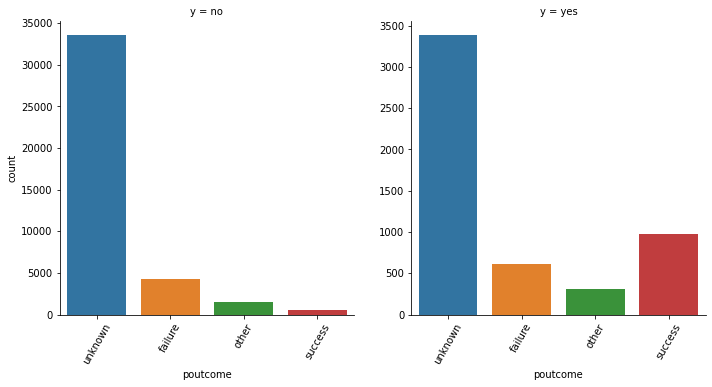

In [ ]:
for col in df.select_dtypes(include=['object', 'boolean']):
    if df[col].nunique() <= 12 and col != 'y':
        g = sns.catplot(x = col, kind='count', col = 'y', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

## ***3.3. Output attributes***

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


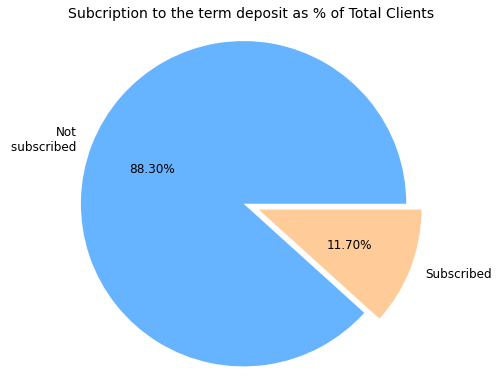

In [ ]:
fig = plt.figure(figsize=(5,5)) 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['y'].value_counts(), 
       labels = ["Not\n subscribed", "Subscribed"],
       explode = (0, 0.1),
       autopct ='%1.2f%%',
       frame = False,
       colors = ['#66b3ff', '#ffcc99'],
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit as % of Total Clients', fontsize = '14')

plt.show()

11.70% customers subscribed to the term deposit. Our classes are imbalanced where positive values (subscribed) are only 11.70%.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# **4. Data preprocessing**

## ***4.1. Feature selection***

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

### **Categorical feature selection**
The Chi-Square test of independence is used to determine if there is a significant relationship between two categorical (nominal) variables.

It means the Chi-Square Test of Independence is a hypothesis testing test with 2 hypotheses present; the Null Hypothesis and the Alternative Hypothesis.

The hypothesis is written below.
* Null Hypothesis (H0): There is no relationship between the variables
* Alternative Hypothesis (H1): There is a relationship between variables

Just like any statistical testing, lets we choose our p-value = 0.05 : Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
* if p-value test result is more than 0.05 , it means that test result will lie in acceptance region and we will accept the null hypothesis
* if p-value test result is less than 0.05 , it means that test result will lie in rejection(critical) region and we will reject the null hypothesis and will accept the alternate hypothesis.

In [ ]:
df_1 = df.copy()

In [ ]:
# Extract categorical attribute columns
cat_cols = df_cat.columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
# Convert data types to category
df_1[cat_cols] = df_1[cat_cols].apply(lambda x:x.astype('category'))

In [ ]:
# Encoding
df_1[cat_cols] = df_1[cat_cols].apply(lambda x:x.cat.codes)

In [ ]:
X_cat = df_1[cat_cols]
Y = df_1['y']

In [ ]:
# Use chi2 function
cs = SelectKBest(score_func=chi2,k=9)
cs.fit(X_cat,Y)
cat_feature_score = pd.DataFrame({"Score":cs.scores_,"P-Value":cs.pvalues_},index=X_cat.columns)
cat_feature_score.nlargest(n=9,columns="Score")

,Score,P-Value
contact,1253.814109,1.230845e-274
housing,388.949715,1.401285e-86
job,182.452260,1.412576e-41
loan,176.516137,2.793375e-40
poutcome,104.677479,1.437254e-24
education,90.617723,1.742922e-21
month,44.321905,2.785815e-11
marital,29.766067,4.874498e-08
default,22.313875,2.315277e-06


### **Numerical feature selection**
* ANOVA(Analysis of Variance) or F-Test is a univariate test,Linear model for testing the individual effect of each of features with target.
* ANOVA assumes a linear relationship between the features and the target, and also that the variables are normally distributed.
* It’s well-suited for continuous variables and requires a binary target

In [ ]:
# Extract numerical attribute columns
num_cols = df_num.columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
X_num = df_1[num_cols]
Y = df_1['y']

In [ ]:
ns = SelectKBest(score_func=f_classif, k=7)
ns_fit = ns.fit(X_num, Y)
num_feature_score = pd.DataFrame({"F-Score":ns_fit.scores_,"P-Value":ns_fit.pvalues_},index=X_num.columns)
num_feature_score.nlargest(n=7,columns="F-Score")

,F-Score,P-Value
duration,8333.761148,0.000000e+00
pdays,490.696563,3.790553e-108
previous,396.443989,7.801830e-88
campaign,243.358404,1.012347e-54
balance,126.572276,2.521114e-29
day,36.359010,1.653880e-09
age,28.625233,8.825644e-08


### **Conclusion of feature selection**

* Top 3 categorical features: `contact`, `housing`, `job`
* Top 3 numerical features: `duration`, `pdays`, `previous`

## ***4.2. Get dummy variables***

In [ ]:
df_2 = df[['contact', 'housing', 'job', 'duration', 'pdays', 'previous', 'y']]
df_2 = pd.get_dummies(df_2, drop_first = True)
df_2

,duration,pdays,previous,contact_telephone,contact_unknown,housing_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,y_yes
0,261,-1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,151,-1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
2,76,-1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,92,-1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,198,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,977,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
45207,456,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45208,1127,184,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45209,508,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## ***4.3. Split and balance the train set***

In [ ]:
X = df_2.drop('y_yes', axis=1)
y = df_2['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [ ]:
nm = NearMiss()
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


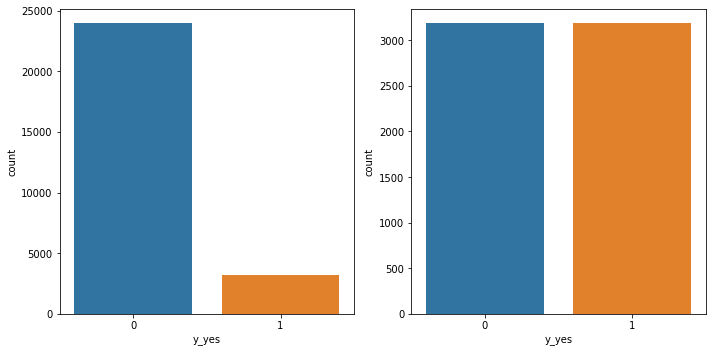

Original working set shape: Counter({0: 23942, 1: 3184})
Resample working set shape: Counter({0: 3184, 1: 3184})


In [ ]:
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.subplot(1,2,2)
sns.countplot(y_train_nm)
plt.show()
print('Original working set shape:', Counter(y_train))
print('Resample working set shape:', Counter(y_train_nm))

<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# **5. Model development**

In this section, we will develop the models to predict who will subscribe the term deposit.
As mentioned earlier in the EDA, the dataset: 
* is imbalanced towards the negative value (0- not subscribed); 
* has 16 features in which 9 are categorical.

Therefore, developing the models on the original dataset may either: i) result in weak prediction of the minor value (1- subscribed), which is our core prediction goal; or ii) generate too many dimensions in the model.


Due to these reasons, we decided to conduct this section as follow:
* Attempt on 5 classifier algorithms: Decision Tree Classifier, Random Forest Classifier, kNN, Logistics Regression, and Gaussian Naive-Bayes.
* Attempt on 3 working set:  original dataset, balanced dataset using NearMiss, and balanced dataset using NearMiss with Top 6 features selected.

Because the nature of the tree-based algorithms enable them to work well on even imbalanced and multi-dimensional dataset, we will only develop models using these algorithms on the original dataset.

## ***5.1. Model developed on the original dataset***

#### ***One-hot Encoding for Original Dataset***

In [ ]:
df_1  = pd.get_dummies(df, drop_first = True)

In [ ]:
X1 = df_1.drop('y_yes', axis=1)
y1 = df_1['y_yes']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.40 ,random_state = 101)

#### ***Decision Tree***

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train1, y_train1)
ytree_pred = dtree.predict(X_test1)

#### ***Random Forest***

In [ ]:
rforest = RandomForestClassifier()
rforest.fit(X_train1, y_train1)
yrf_pred = rforest.predict(X_test1)

#### ***kNN***

In [ ]:
sc = StandardScaler()
X_train_scale_ori = sc.fit_transform(X_train1)
X_test_scale_ori = sc.transform(X_test1)

Optimal k: 19


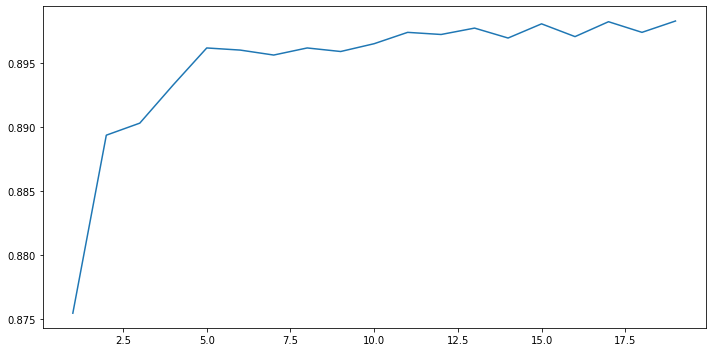

In [ ]:
# Calculate accuracy scores corresponding to k
accuracy_scores = {}
for i in range(1,20):
    knn_ori = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2, algorithm = 'brute')
    knn_ori.fit(X_train_scale_ori,y_train1)
    y_pred_ori = knn_ori.predict(X_test_scale_ori)
    accuracy_scores[i] = accuracy_score(y_test1,y_pred_ori)

# Plot accuracy scores
plt.plot(list(accuracy_scores.keys()),list(accuracy_scores.values()))
optimal_k = max(accuracy_scores.items(), key = lambda k : k[1])
print('Optimal k: {}'.format(optimal_k[0]))

In [ ]:
#Train kNN model
knn_ori = KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', p = 2, algorithm = 'brute')
knn_ori.fit(X_train_scale_ori, y_train1)

KNeighborsClassifier(algorithm='brute', n_neighbors=19)

In [ ]:
#predict y on test set
knnori_pred = knn_ori.predict(X_test_scale_ori)

#### ***Logistic Regression***

In [ ]:
#Train model
log_ori = LogisticRegression()
log_ori.fit(X_train_scale_ori, y_train1)

LogisticRegression()

In [ ]:
#predict on test set
logori_pred = log_ori.predict(X_test_scale_ori)

#### ***Naive Bayes***

In [ ]:
#Train model
nb_ori = GaussianNB()
nb_ori.fit(X_train_scale_ori, y_train1)

GaussianNB()

In [ ]:
#predict on test set
nbori_pred = nb_ori.predict(X_test_scale_ori)

## ***5.2. Model developed on balanced working set***

In [ ]:
df3  = pd.get_dummies(df, drop_first = True)

In [ ]:
X3 = df3.drop('y_yes', axis=1)
y3 = df3['y_yes']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state = 101)

In [ ]:
nm = NearMiss()
X_train_nm3, y_train_nm3 = nm.fit_resample(X_train3, y_train3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


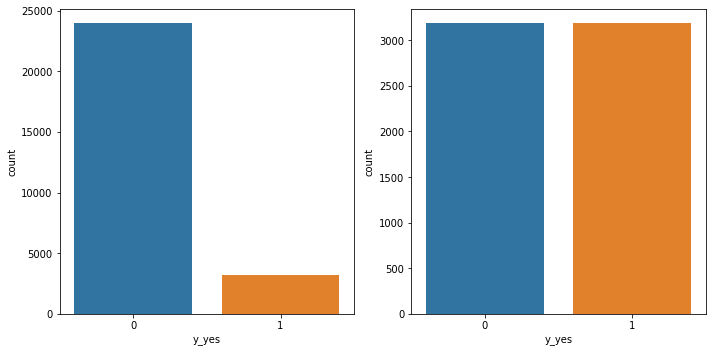

Original working set shape: Counter({0: 23942, 1: 3184})
Resample working set shape: Counter({0: 3184, 1: 3184})


In [ ]:
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1,2,1)
sns.countplot(y_train3)
plt.subplot(1,2,2)
sns.countplot(y_train_nm3)
plt.show()
print('Original working set shape:', Counter(y_train3))
print('Resample working set shape:', Counter(y_train_nm3))

In [ ]:
sc = StandardScaler()
X_train_nm_scale3 = sc.fit_transform(X_train_nm3)
X_test_scale3 = sc.transform(X_test3)

#### ***kNN***

Optimal k: 18


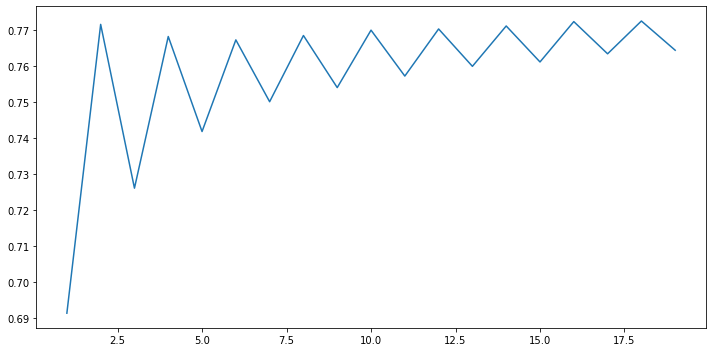

In [ ]:
# Calculate accuracy scores corresponding to k
accuracy_scores = {}
for i in range(1,20):
    knn3 = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2, algorithm = 'brute')
    knn3.fit(X_train_nm_scale3,y_train_nm3)
    knn3_pred = knn3.predict(X_test_scale3)
    accuracy_scores[i] = accuracy_score(y_test,knn3_pred)

# Plot accuracy scores
plt.plot(list(accuracy_scores.keys()),list(accuracy_scores.values()))
optimal_k = max(accuracy_scores.items(), key = lambda k : k[1])
print('Optimal k: {}'.format(optimal_k[0]))

In [ ]:
#Train kNN model
knn3 = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2, algorithm = 'brute')
knn3.fit(X_train_nm_scale3, y_train_nm3)

KNeighborsClassifier(algorithm='brute', n_neighbors=18)

In [ ]:
#predict y on test set
knn3_pred = knn3.predict(X_test_scale3)

#### ***Logistic Regression***

In [ ]:
#Train model
log3 = LogisticRegression()
log3.fit(X_train_nm_scale3, y_train_nm3)

LogisticRegression()

In [ ]:
#predict on test set
log3_pred = log3.predict(X_test_scale3)

#### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Train model
nb3 = GaussianNB()
nb3.fit(X_train_nm_scale3, y_train_nm3)

GaussianNB()

In [ ]:
#predict on test set
nb3_pred = nb3.predict(X_test_scale3)

## ***5.3 Model developed on balanced working set with feature selection***

#### ***kNN***

In [ ]:
sc = StandardScaler()
X_train_nm_scale = sc.fit_transform(X_train_nm)
X_test_scale = sc.transform(X_test)

Optimal k: 2


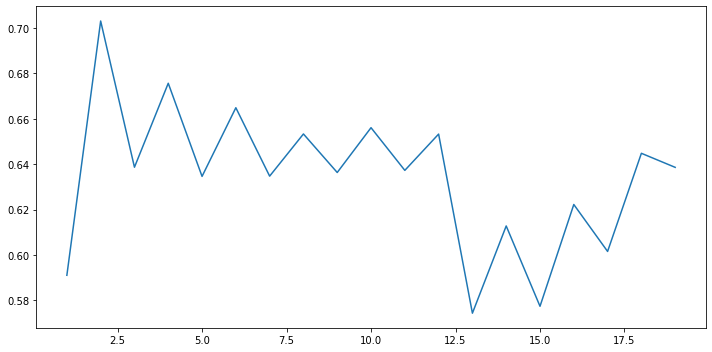

In [ ]:
# Calculate accuracy scores corresponding to k
accuracy_scores = {}
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2, algorithm = 'brute')
    knn.fit(X_train_nm_scale,y_train_nm)
    knn_pred = knn.predict(X_test_scale)
    accuracy_scores[i] = accuracy_score(y_test,knn_pred)

# Plot accuracy scores
plt.plot(list(accuracy_scores.keys()),list(accuracy_scores.values()))
optimal_k = max(accuracy_scores.items(), key = lambda k : k[1])
print('Optimal k: {}'.format(optimal_k[0]))

In [ ]:
#Train kNN model
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2, algorithm = 'brute')
knn.fit(X_train_nm_scale, y_train_nm)
#predict y on test set
knn_pred = knn.predict(X_test_scale)

#### ***Logistic Regression***

In [ ]:
#Train model
log = LogisticRegression()
log.fit(X_train_nm_scale, y_train_nm)

LogisticRegression()

In [ ]:
#predict on test set
log_pred = log.predict(X_test_scale)

#### ***Naive Bayes***

In [ ]:
#Train model
nb = GaussianNB()
nb.fit(X_train_nm_scale, y_train_nm)

GaussianNB()

In [ ]:
#predict on test set
nb_pred = nb.predict(X_test_scale)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# **6. Model evaluation**

In this section, we will evaluate the total of 11 models developed previously. The goals of model evaluation are to answer the following questions:
* Does feature selection improve model accuracy and help us achieve our priorities better?
* Does class balancing improve model accuracy and help us achieve our priorities better?
* Among the remaining models, which one has the highest accuracy and best achieves our priorities?

## ***6.1 Evaluate Models***

In [ ]:
print('kNN feature selection accuracy:',accuracy_score(y_test, knn_pred))
print('kNN non-feature selection accuracy:',accuracy_score(y_test3, knn3_pred))
print('kNN original accuracy:',accuracy_score(y_test1, knnori_pred))

kNN feature selection accuracy: 0.703068841581421
kNN non-feature selection accuracy: 0.7725739563173901
kNN original accuracy: 0.8982582250483826


In [ ]:
print('Logistic regression feature selection accuracy:',accuracy_score(y_test, log_pred))
print('Logistic regression non-feature selection accuracy:',accuracy_score(y_test3, log3_pred))
print('Logistic regression original accuracy:',accuracy_score(y_test1, logori_pred))

Logistic regression feature selection accuracy: 0.721537185512856
Logistic regression non-feature selection accuracy: 0.6144871440420238
Logistic regression original accuracy: 0.9050041470832182


In [ ]:
print('Naive Bayes feature selection accuracy:',accuracy_score(y_test, nb_pred))
print('Naive Bayes non-feature selection accuracy:',accuracy_score(y_test3, nb3_pred))
print('Naive Bayes original accuracy:',accuracy_score(y_test1, nbori_pred))

Naive Bayes feature selection accuracy: 0.7056123859552115
Naive Bayes non-feature selection accuracy: 0.663146253801493
Naive Bayes original accuracy: 0.8656897981752834


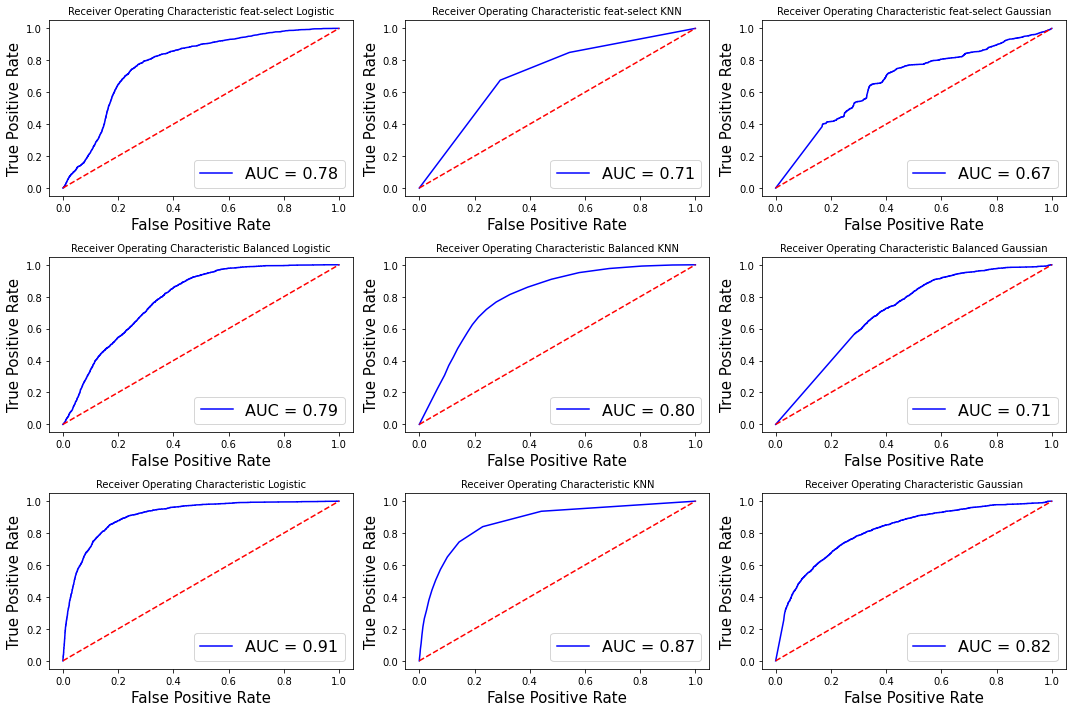

In [ ]:
fig, ax_arr = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))

#Feature Selection LOGMODEL
probs = log.predict_proba(X_test_scale)
preds = probs[:,1]
fprlogf, tprlogf, thresholdlogf = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlogf, tprlogf)

ax_arr[0,0].plot(fprlogf, tprlogf, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic feat-select Logistic',fontsize=10)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#Balanced LOGMODEL
probs = log3.predict_proba(X_test_scale3)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test3, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[1,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Balanced Logistic',fontsize=10)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#LOGMODEL original
probs = log_ori.predict_proba(X_test_scale_ori)
preds = probs[:,1]
fprlogo, tprlogo, thresholdlogo = metrics.roc_curve(y_test1, preds)
roc_auclog = metrics.auc(fprlogo, tprlogo)

ax_arr[2,0].plot(fprlogo, tprlogo, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[2,0].plot([0, 1], [0, 1],'r--')
ax_arr[2,0].set_title('Receiver Operating Characteristic Logistic',fontsize=10)
ax_arr[2,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[2,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,0].legend(loc = 'lower right', prop={'size': 16})

#Feature Selection KNN
probs = knn.predict_proba(X_test_scale)
preds = probs[:,1]
fprknnf, tprknnf, thresholdknnf = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknnf, tprknnf)

ax_arr[0,1].plot(fprknnf, tprknnf, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic feat-select KNN',fontsize=10)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#Balanced KNN
probs = knn3.predict_proba(X_test_scale3)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test3, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[1,1].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Balanced KNN',fontsize=10)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#KNN original
probs = knn_ori.predict_proba(X_test_scale_ori)
preds = probs[:,1]
fprknno, tprknno, thresholdknno = metrics.roc_curve(y_test1, preds)
roc_aucknn = metrics.auc(fprknno, tprknno)

ax_arr[2,1].plot(fprknno, tprknno, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[2,1].plot([0, 1], [0, 1],'r--')
ax_arr[2,1].set_title('Receiver Operating Characteristic KNN',fontsize=10)
ax_arr[2,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[2,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,1].legend(loc = 'lower right', prop={'size': 16})

#Feature Selection GAUSSIAN
probs = nb.predict_proba(X_test_scale)
preds = probs[:,1]
fprgauf, tprgauf, thresholdgauf = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgauf, tprgauf)

ax_arr[0,2].plot(fprgauf, tprgauf, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic feat-select Gaussian',fontsize=10)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#Balanced GAUSSIAN
probs = nb3.predict_proba(X_test_scale3)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test3, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('Receiver Operating Characteristic Balanced Gaussian',fontsize=10)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN original
probs = nb_ori.predict_proba(X_test_scale_ori)
preds = probs[:,1]
fprgauo, tprgauo, thresholdgauo = metrics.roc_curve(y_test1, preds)
roc_aucgau = metrics.auc(fprgauo, tprgauo)

ax_arr[2,2].plot(fprgauo, tprgauo, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[2,2].plot([0, 1], [0, 1],'r--')
ax_arr[2,2].set_title('Receiver Operating Characteristic Gaussian',fontsize=10)
ax_arr[2,2].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[2,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

* Feature-selection and balance models is the worst models because of lack input variables, and models is under-fitting. 
* The original dataset model have AUC and Accuracy score higher than these other. The reason is Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples. So we may have loss valuable information while reducing the major data points to acquire balance classification.

## ***6.2: Choosed Model Analysis***

Here, our priorities in developing the model are:
* Minimize the number of non-subscribers that are wrongly predicted as subscribers (False Positive)
* Minimize the number of subscribed that are omitted as non-subscriber (False Negative)

While the former focuses on more precise targeting and thus cost reduction for the campaign, the latter focuses on full capture of potential subscribers to increase campaign efficiency.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

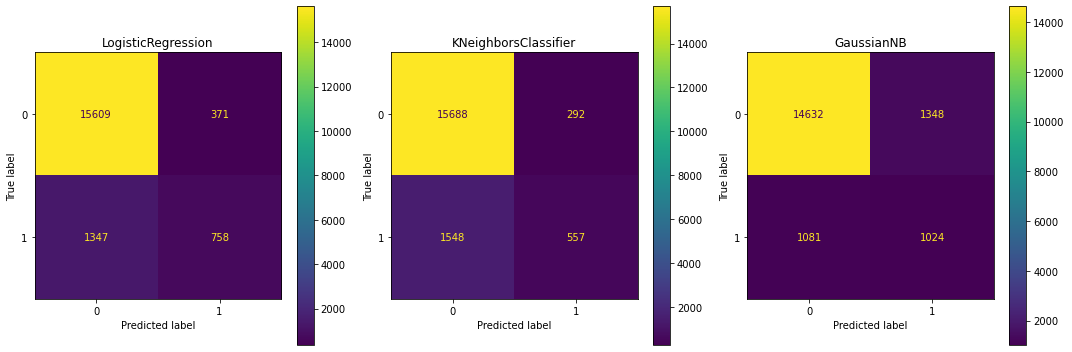

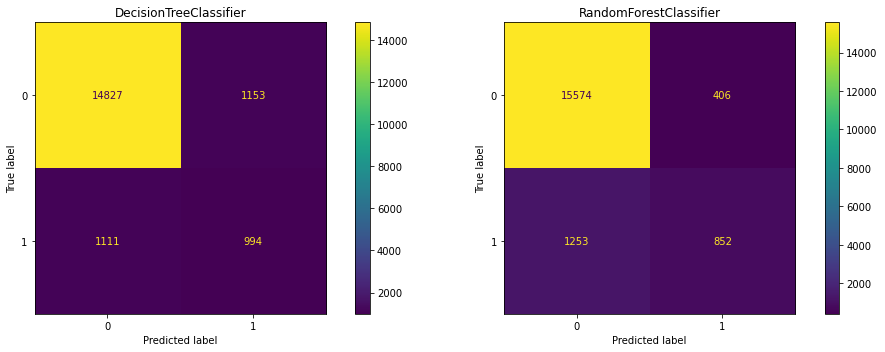

In [ ]:
classifiers = [log_ori, knn_ori, nb_ori]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test_scale_ori, 
                          y_test1, 
                          ax=ax)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  

classifiers2 = [dtree, rforest]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for cls, ax in zip(classifiers2, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test1, 
                          y_test1, 
                          ax=ax)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [ ]:
print('Classification report of Random forest \n',classification_report(y_test1, yrf_pred))
print('Classification report of Decision tree \n',classification_report(y_test1, ytree_pred))
print('Classification report of Logistic regression \n',classification_report(y_test1, logori_pred))
print('Classification report of kNN \n',classification_report(y_test1, knnori_pred))
print('Classification report of Naive Bayes \n',classification_report(y_test1, nbori_pred))

Classification report of Random forest 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     15980
           1       0.68      0.40      0.51      2105

    accuracy                           0.91     18085
   macro avg       0.80      0.69      0.73     18085
weighted avg       0.90      0.91      0.90     18085

Classification report of Decision tree 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     15980
           1       0.46      0.47      0.47      2105

    accuracy                           0.87     18085
   macro avg       0.70      0.70      0.70     18085
weighted avg       0.88      0.87      0.88     18085

Classification report of Logistic regression 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     15980
           1       0.67      0.36      0.47      2105

    accuracy                           0.91     18085

As per priorities mentioned, our priorities are:

* Minimize the number of non-subscribers that are wrongly predicted as subscribers (False Positive)
* Minimize the number of subscribed that are omitted as non-subscriber (False Negative)

The former is most harmful, because we think that we already have that client but we dont and maybe we lost him/her in other future campaigns. The latter is not good but still acceptable as we have that client and in the future we'll discovery that in truth he/she is already our client.

Based on this arguments, we will choose the model that produce the least False Positive, which from the confusion matrices shown above, is the kNN developed on the original dataset.